# Using Regression and Gradient Boosting Classifier to see understand deaths aboard Titanic

1. Import all your libaries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv('titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test = pd.read_csv('test.csv')

In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.shape, test.shape

((891, 12), (418, 11))

Define y

In [12]:
#choose your dependent variable depending on the problem you're looking to solve
y = train.Survived

In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
#drop the survived column because we want to predict who survived based on our new vari.
datasets = [train.drop(['Survived'], axis=1), test]

In [15]:
#make a new dataframe based on dropping the survived column from the training set
df = pd.concat(datasets)

In [16]:
#lets see a snapshot of this new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [17]:
df.isnull().sum() #total up the number of columns with missing values

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Fill in the missing Fare

In [18]:
df.Fare.describe() #add up all the fare columns, tell us the mean, stand dev, min, max

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

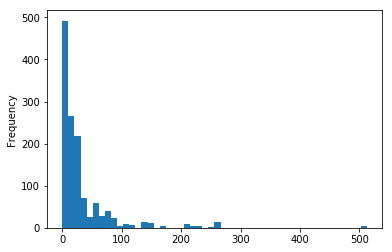

In [19]:
# show us a histogram of the Fare column data
df.Fare.dropna().plot(kind='hist', bins=50)

In [20]:
# fill in the median value where Fare is blank/null
df.Fare.fillna(df.Fare.median(), inplace=True)

In [21]:
#show us a summary of all empty fields within the fare column. this will confirm
# that all the fare empty fields have been filled
df.Fare.isnull().sum()

0

Now lets move on to fill in all missing field in Embarked

In [22]:
#from our train data set lets see how many
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [23]:
# show me the missing values from the embarked column within df
df[pd.isnull(df['Embarked'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [24]:
# show me the  diff types of embarked values 
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

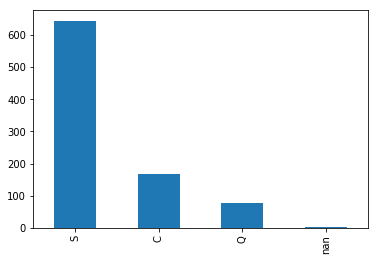

In [25]:
#build a graph that shows us the value counts for all the places passen embarked from
#dropna=false, we wanted NaN to be presend on graph
train.Embarked.value_counts(dropna=False).plot(kind='bar')

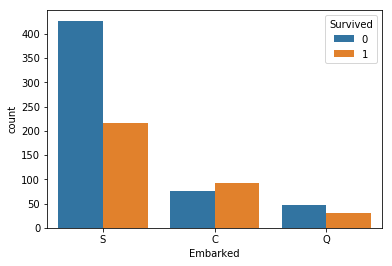

In [26]:
#give us a plot that shows (x=embarked, y=survived in a diff color) from the train dataframe
sns.countplot(x="Embarked", hue='Survived', data=train)

In [27]:
#replace all the not a number with S
df.Embarked.replace(np.nan, "S", inplace=True)

Now lets fill in Missing Age, the 3rd biggest missing value column

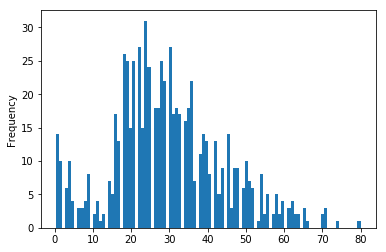

In [28]:
#make a histogram of all the age column values without the missing values
train.Age.dropna().plot(kind='hist', bins=100)

In [29]:
#hmm, may look like a normal dist, lets calc the mean and median to be sure
df.Age.mean(), df.Age.median()

(29.881137667304014, 28.0)

In [30]:
#it is normal as mean and median are close, therefore we can use the mean to fill in the..
#...missing values

#show us the mean of the ages of men and women, by grouping all men togeth and women togeth
df.groupby('Sex')[['Age']].mean()

,Age
Sex,
female,28.687088
male,30.585228


In [31]:
#assign the avg age of each gender group, calculate above to the variable avg_age
avg_age = df.groupby('Sex')['Age'].mean()

In [32]:
avg_age[0], avg_age[1]

(28.68708762886598, 30.58522796352584)

In [33]:
#assign index 0 row as female variable avg_age_female, assign index 1 as male variable
avg_age_female = avg_age[0]
avg_age_male = avg_age[1]

In [34]:
#show us the first 10 rows of the missing age data just to double check that age is NaN
df[pd.isnull(df['Age'])].head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [35]:
#we are assigning the value of avg female age back into age column
df['Age'] = np.where(((df['Age'].isnull())&(df['Sex']=='female')), avg_age_female,df['Age'])

In [36]:
#we want to double check that the df age, female NaN has been changed properly
df.loc[[19,28,32]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,3,"Masselmani, Mrs. Fatima",female,28.687088,0,0,2649,7.2250,NaN,C
19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.000000,0,0,2696,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.687088,0,0,330959,7.8792,NaN,Q
28,920,1,"Brady, Mr. John Bertram",male,41.000000,0,0,113054,30.5000,A21,S
32,33,3,"Glynn, Miss. Mary Agatha",female,28.687088,0,0,335677,7.7500,NaN,Q
32,924,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.000000,1,2,C.A. 2315,20.5750,NaN,S


In [37]:
df['Age'] = np.where((((df['Age'].isnull()))&(df['Sex']=='male')), avg_age_male,df['Age'])

In [38]:
df.loc[[5,17,19,28,32,31,36,42]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,30.585228,0,0,330877,8.4583,NaN,Q
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S
17,18,2,"Williams, Mr. Charles Eugene",male,30.585228,0,0,244373,13.0000,NaN,S
17,909,3,"Assaf, Mr. Gerios",male,21.000000,0,0,2692,7.2250,NaN,C
19,20,3,"Masselmani, Mrs. Fatima",female,28.687088,0,0,2649,7.2250,NaN,C
19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.000000,0,0,2696,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.687088,0,0,330959,7.8792,NaN,Q
28,920,1,"Brady, Mr. John Bertram",male,41.000000,0,0,113054,30.5000,A21,S
32,33,3,"Glynn, Miss. Mary Agatha",female,28.687088,0,0,335677,7.7500,NaN,Q
32,924,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.000000,1,2,C.A. 2315,20.5750,NaN,S


In [39]:
#using lambda function to strip out the alphabet value from the cabin column
#where there is a missing value in cabin, replace with U to represent Unkonwn
df.Cabin.fillna('U', inplace=True)

In [40]:
#assign a new df just for the cabin, made from
#map acts as a for loop, its checking all the data from cabin column of every row...
#... passing the value to lambda for the operation that lambda performs on value(just give us index 0)
#lambda x: is how lambda takes the value and puts it in x. we want to keep a and elimate number

df.Cabin = df.Cabin.map(lambda x: x[0])

In [41]:
#show us all the unique values within the column cabin, show us the letter next to cabin number

df.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [42]:
#double check that everything is the same and still there
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


let's assess family size

In [43]:
#make a new column in our trainign df and call it family
#by adding 1 we are accounting for that individual 
df['Family'] = df.SibSp+df.Parch+1

In [44]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1


In [45]:
#we want to count the amount of families
df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [46]:
#because there are so many families, we want to break up these into single, big,
#we can see if there was a pattern or trend with survivial
df['Single'] = df.Family<2
df['Small'] = (df.Family>1)&(df.Family<5)
df['Medium'] = (df.Family>4)&(df.Family<7)
df['Large'] = (df.Family>6)

df.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Single,Small,Medium,Large
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U,S,2,False,True,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,2,False,True,False,False
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S,1,True,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,2,False,True,False,False
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U,S,1,True,False,False,False
5,6,3,"Moran, Mr. James",male,30.585228,0,0,330877,8.4583,U,Q,1,True,False,False,False
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E,S,1,True,False,False,False
7,8,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U,S,5,False,False,True,False
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U,S,3,False,True,False,False
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U,C,2,False,True,False,False


In [47]:
df.Fare.describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [48]:
#you have the option to assign columns for low median high and extreme ticket prices
#check to see if it makes a diff in the algo, is it helping? if not, discard

Now we are going to find the title within the name and create columns based on titles

In [49]:
#show us the first indexs of the name column
df.Name[:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [50]:
#use lambda function to split the letters before the dot away from behind dot
#then i was to strip letters behind the dot away
df['Title'] = df.Name.map(lambda x: x.split(',')[1].split('.')[0].strip())


In [51]:
df.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Mme               1
Sir               1
Don               1
Dona              1
Capt              1
Jonkheer          1
Lady              1
the Countess      1
Name: Title, dtype: int64

In [52]:
#very long lamdba function that seperates every form of title into the 7 tites we assigned
df.Title = df.Title.map(lambda x: 'Col' if x=='Ms' else 'Col' if x=='Major'
else 'Col' if x=='Mlle' else 'Col' if x=='Mme'\
                        else 'Col' if x=='the Countess' else 'Col' if x=='Don' else 'Col' if x=='Lady' else 'Col' if x=='Sir'\
                        else 'Col' if x=='Jonkheer' else 'Col' if x=='Dona' 
else 'Col' if x=='Capt' else x)

In [53]:
#give us the total value count for each title type
df.Title.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Col        18
Dr          8
Rev         8
Name: Title, dtype: int64

In [54]:
#let us double check to be sure that our new column, title is part of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Family         1309 non-null int64
Single         1309 non-null bool
Small          1309 non-null bool
Medium         1309 non-null bool
Large          1309 non-null bool
Title          1309 non-null object
dtypes: bool(4), float64(2), int64(5), object(6)
memory usage: 188.3+ KB


In [55]:
#show us what the first 5 rows looks like so we double check our data and columns
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Single,Small,Medium,Large,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,2,False,True,False,False,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,False,True,False,False,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,True,False,False,False,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,False,True,False,False,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,True,False,False,False,Mr


In [56]:
#get rid of the name for every row
df.drop('Name', axis=1, inplace=True)a

In [57]:
#get rid of passenger id, ticket and fare columns, and confirm that theyre off df
df.drop(['PassengerId', 'Ticket', 'Fare'], axis=1, inplace=True)

In [58]:
#assign the passenger class as a new category
df.Pclass = df.Pclass.astype("category", ordered=True)

/Users/alisonbunce/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
#show us column info from df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Pclass      1309 non-null category
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Cabin       1309 non-null object
Embarked    1309 non-null object
Family      1309 non-null int64
Single      1309 non-null bool
Small       1309 non-null bool
Medium      1309 non-null bool
Large       1309 non-null bool
Title       1309 non-null object
dtypes: bool(4), category(1), float64(1), int64(3), object(4)
memory usage: 138.5+ KB


In [60]:
#assign a new df with dummies columns (all the broken out columns)
df_dummies = pd.get_dummies(df, drop_first=True)

In [61]:
#show us all the stats of our dummies df
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 27 columns):
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Family          1309 non-null int64
Single          1309 non-null bool
Small           1309 non-null bool
Medium          1309 non-null bool
Large           1309 non-null bool
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Sex_male        1309 non-null uint8
Cabin_B         1309 non-null uint8
Cabin_C         1309 non-null uint8
Cabin_D         1309 non-null uint8
Cabin_E         1309 non-null uint8
Cabin_F         1309 non-null uint8
Cabin_G         1309 non-null uint8
Cabin_T         1309 non-null uint8
Cabin_U         1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
Title_Dr        1309 non-null uint8
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null ui

In [62]:
#show us all the column names within our dummies df
df_dummies.columns

Index(['Age', 'SibSp', 'Parch', 'Family', 'Single', 'Small', 'Medium', 'Large',
       'Pclass_2', 'Pclass_3', 'Sex_male', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_Q',
       'Embarked_S', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rev'],
      dtype='object')

In [63]:
#assign a new df that consists of all dummies columns from index 0 to last person
#remember that the total dataset consists of 891 people
df_train = df_dummies[:891]

In [64]:
#now assign a test dataframe that starts from our last person to index 0
df_test = df_dummies[891:]

In [65]:
#give us the total rows and colums of the new test and training dataframes
df_train.shape, df_test.shape

((891, 27), (418, 27))

In [66]:
#from the library sklearn, choose cross validation metric
#import the full load of split train and test dataframe
from sklearn.model_selection import train_test_split

In [67]:
#assign x and y variables for both test and train dataframes
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 27), (179, 27), (712,), (179,))

Logistic

we chose testing with logistic regression because...

In [68]:
#import logistic regression, import accuracy,precision, recall, rocauc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [69]:
#assign logis regress variable as reg
reg = LogisticRegression()

#assign regression fitting variable as log model
log_model = reg.fit(X_train, y_train)

#assign
log_model_pred = log_model.predict(X_test)

/Users/alisonbunce/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
#show us the accuracy, prec, recall, roc auc scores all calculated by the y tst and logistic model prediction
#my algo prediction is in total 83% correct. on an average you are 83% correct.  in false postives and false negatives.
print (accuracy_score(y_test,log_model_pred))

#i am 74% correct in predicting who survived. survival is the target the precision is how close i am to the target
print (precision_score(y_test, log_model_pred))

# of the people who survied, i predicted 80% of them correct
print (recall_score(y_test, log_model_pred))

# just like accuracy, 83% is when i was correct (similar to accur but a little diff)
print (roc_auc_score(y_test, log_model_pred))

0.8379888268156425
0.746268656716418
0.8064516129032258
0.8305762338020402


In [71]:
#tell us the length of the logistic model prediction
#how many people were in the test data set. how many people i predicted in this algo.  x test and y test
#i divived my test
len(log_model_pred)

179

In [72]:
#lets try a diff algo and see if we can get a better result

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [74]:
# assign the gradient boosting classifier algo as a variable with 100 trees
g_clf = GradientBoostingClassifier(n_estimators=100)
#apply this to the independent, x, and dependent,y, variables within the train set
g_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [75]:
#
g_clf_pred = g_clf.predict(X_test)

#
print (accuracy_score(y_test, g_clf_pred))
print (precision_score(y_test, g_clf_pred))
print (recall_score(y_test, g_clf_pred))
print (roc_auc_score(y_test, g_clf_pred))

#
len(g_clf_pred)

0.8491620111731844
0.7868852459016393
0.7741935483870968
0.8315412186379927


179

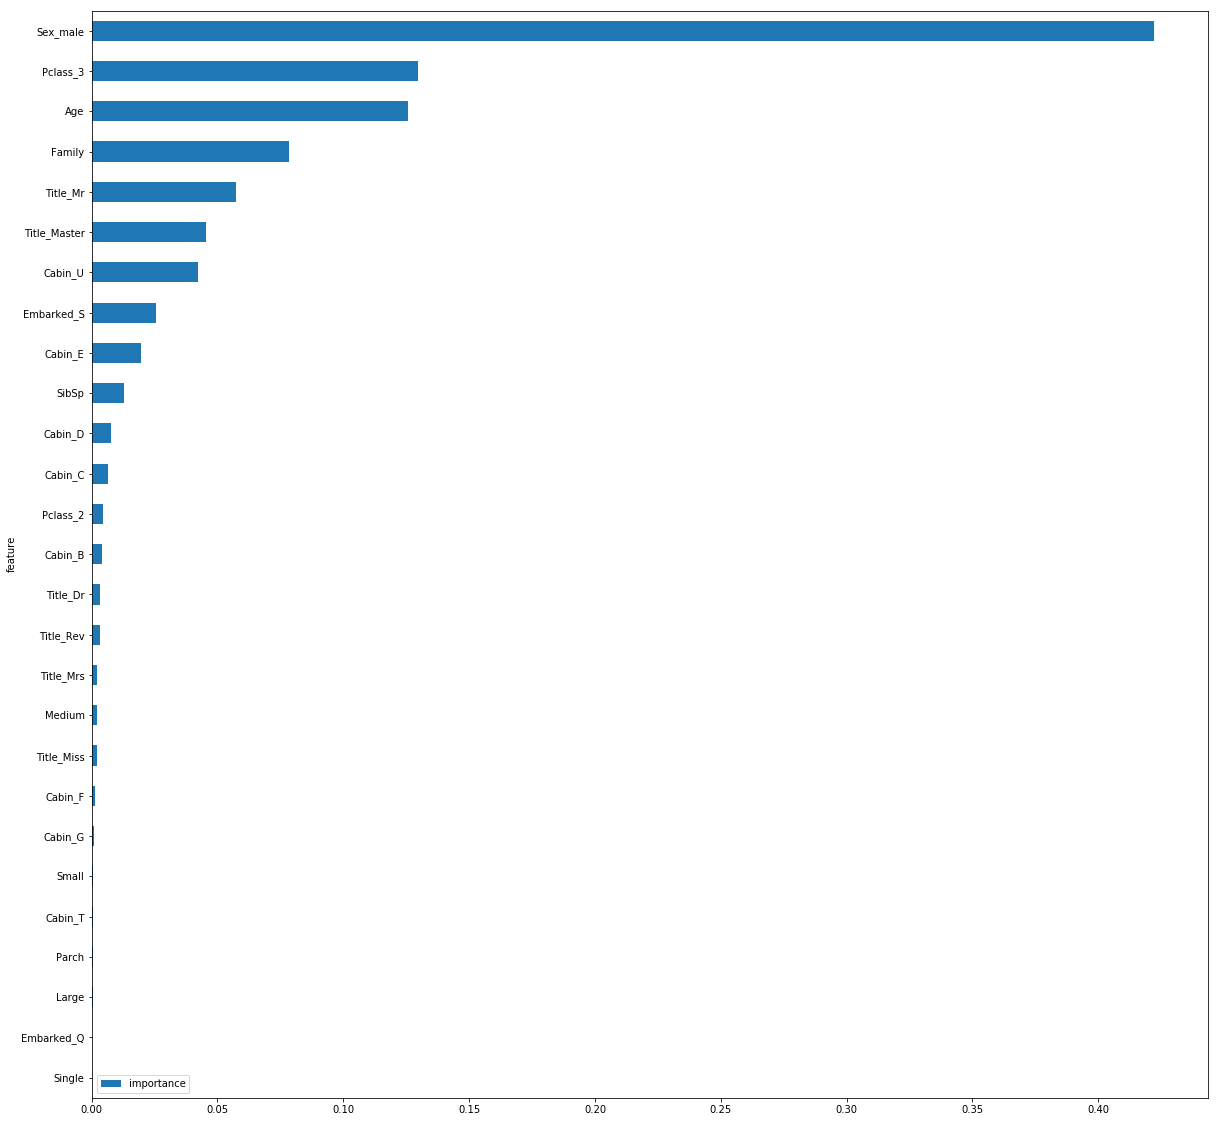

In [76]:
# make a new database that graphically show us the list of the most important features
features = pd.DataFrame()
features['feature'] = df_train.columns
features['importance'] = g_clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20,20))

In [77]:
#assign a variable for the purpose of exporting our test data applied with our gradient boosting classifier algo
g_cld_pred_kaggle = g_clf.predict(df_test)

In [78]:
#call the variable
g_cld_pred_kaggle

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [79]:
test['Survived'] = g_cld_pred_kaggle

In [80]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [81]:
submission = test[['PassengerId', 'Survived']]
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1


In [82]:
submission.to_csv('submission_grb.csv', index=False)